In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import joblib

import spacy
import contractions
import string
import re
from bs4 import BeautifulSoup
from unidecode import unidecode
import nltk
import swifter
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

from sklearn.pipeline import Pipeline
from transformers import AutoTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
from multiprocessing import Pool
from sklearn.feature_extraction.text import HashingVectorizer


from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
df = pd.read_csv('/LIAR_preprocessed_nolemma.csv')

In [3]:
X = df['text']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7969 entries, 0 to 7968
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   7969 non-null   int64 
 1   text    7969 non-null   object
dtypes: int64(1), object(1)
memory usage: 124.6+ KB


In [5]:
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

X_train_bow = preprocessing.normalize(X_train_bow)
X_test_bow = preprocessing.normalize(X_test_bow)

In [6]:
SVC = svm.SVC()

In [7]:
SVC.fit(X_train_bow, y_train)

prd_SVC = SVC.predict(X_test_bow)

In [8]:
print(classification_report(y_test, prd_SVC))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1356
           1       0.65      0.50      0.56      1035

    accuracy                           0.67      2391
   macro avg       0.66      0.65      0.65      2391
weighted avg       0.66      0.67      0.66      2391



In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [10]:
binary_predictions = []

for i in prd_SVC:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.6670849017147636
Precision on testing set: 0.4985507246376812
Recall on testing set: 0.6506935687263556


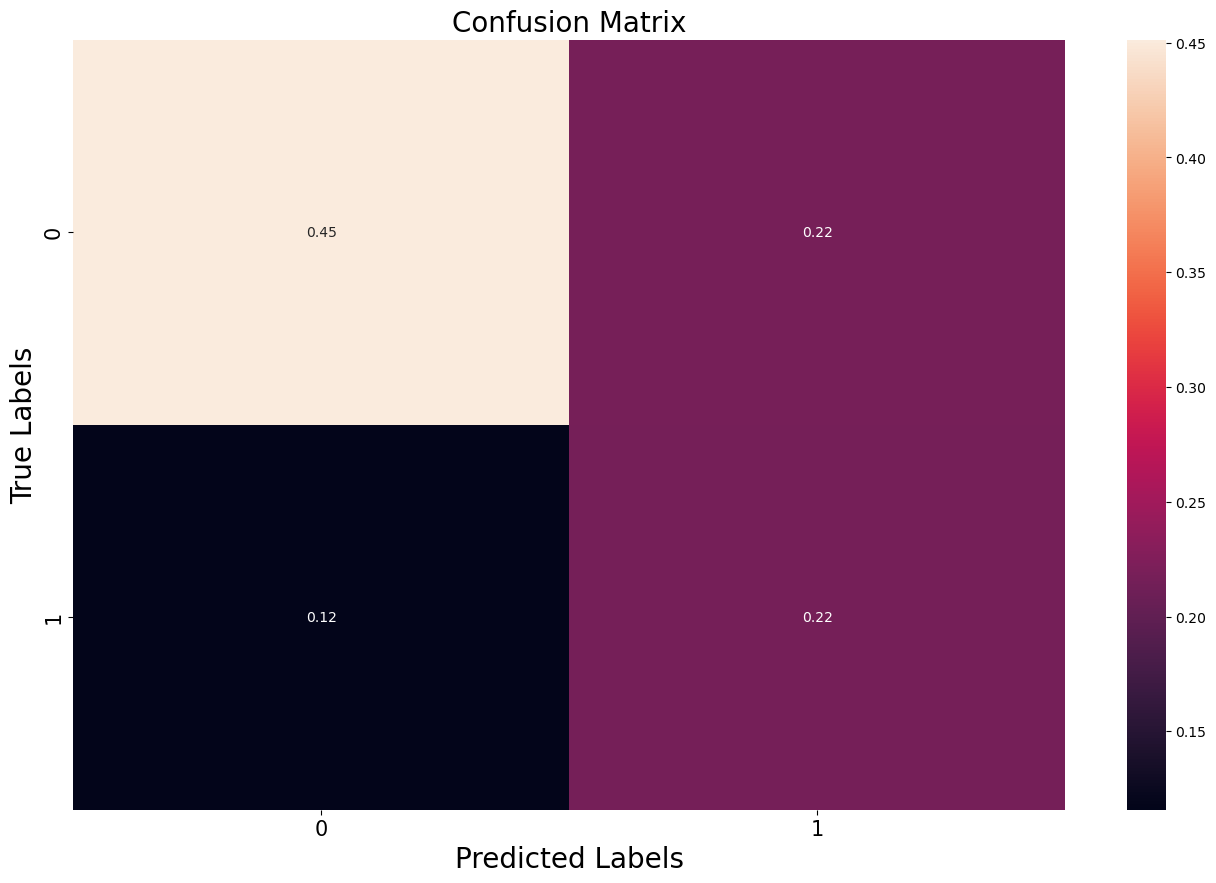

In [11]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

In [ ]:
prd_df = pd.read_csv('/HugeDatasetPredictSample.csv')

val_text = prd_df['text']
val_label = prd_df['label']

In [13]:
val_text_bow = vectorizer.transform(val_text)

val_text_bow = preprocessing.normalize(val_text_bow)

In [14]:
pred = SVC.predict(val_text_bow)

In [15]:
binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.6732
Precision on testing set: 0.22870813397129186
Recall on testing set: 0.45756222080408426


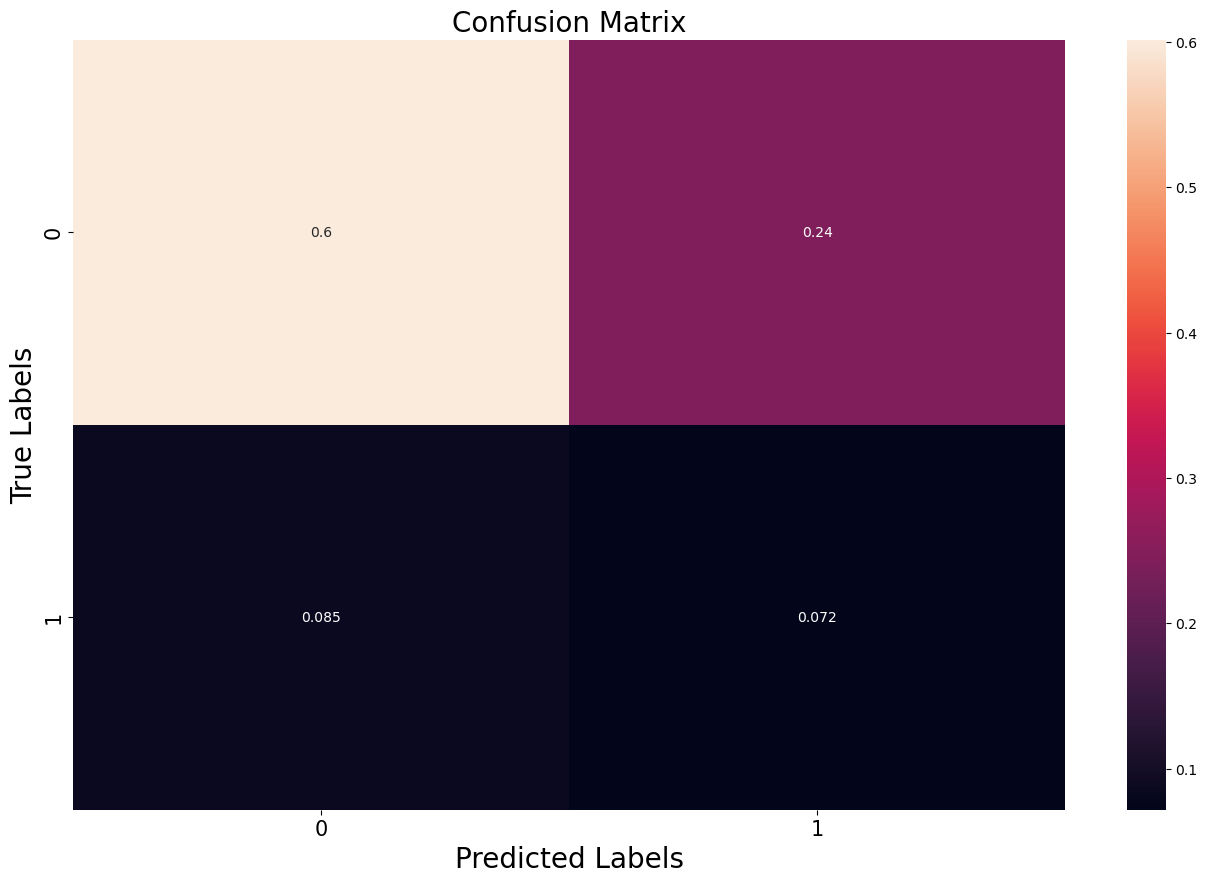

In [16]:
matrix = confusion_matrix(binary_predictions, val_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, val_label))
print('Precision on testing set:', precision_score(binary_predictions, val_label))
print('Recall on testing set:', recall_score(binary_predictions, val_label))

In [17]:
print("LIAR Classification Report on Fake News Corpus Validation set (Using SVC)\n")
print(classification_report(binary_predictions, val_label))

LIAR Classification Report on Fake News Corpus Validation set (Using SVC)

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      8433
           1       0.23      0.46      0.30      1567

    accuracy                           0.67     10000
   macro avg       0.55      0.59      0.55     10000
weighted avg       0.77      0.67      0.71     10000



Accuracy on testing set: 0.527279589583013
Precision on testing set: 0.2822043879591334
Recall on testing set: 0.5751367645416993


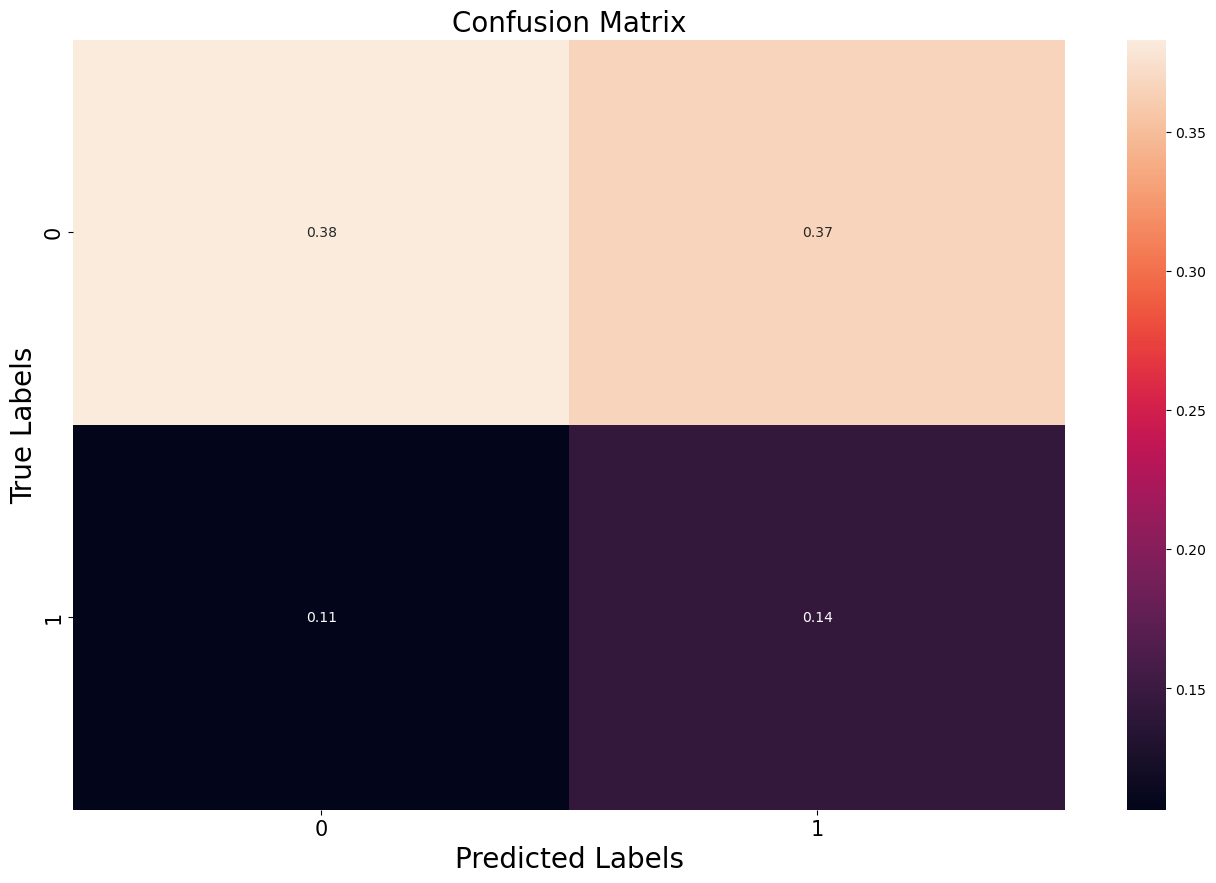

In [ ]:
val02_df = pd.read_csv('/WELFake_Dataset.csv')

val02_df.dropna(inplace=True)

val02_text = val02_df['text']
val02_label = val02_df['label']

val02_text_bow = vectorizer.transform(val02_text)

val02_text_bow = preprocessing.normalize(val02_text_bow)

pred_val02 = SVC.predict(val02_text_bow)

binary_predictions_val02 = []

for i in pred_val02:
    if i >= 0.5:
        binary_predictions_val02.append(1)
    else:
        binary_predictions_val02.append(0) 
        
matrix = confusion_matrix(binary_predictions_val02, val02_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions_val02, val02_label))
print('Precision on testing set:', precision_score(binary_predictions_val02, val02_label))
print('Recall on testing set:', recall_score(binary_predictions_val02, val02_label))

In [19]:
print("LIAR Classification Report on WELFake set (Using SVC)\n")
print(classification_report(binary_predictions_val02, val02_label))

LIAR Classification Report on WELFake set (Using SVC)

              precision    recall  f1-score   support

           0       0.78      0.51      0.62     53623
           1       0.28      0.58      0.38     17914

    accuracy                           0.53     71537
   macro avg       0.53      0.54      0.50     71537
weighted avg       0.66      0.53      0.56     71537

